In [139]:
# Import the necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm


In [140]:
# Load the dataset
diabetesdf = pd.read_csv('diabetes.csv')

In [187]:
# viewing the dataset
diabetesdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA 
#### Exploratory Data Analysis

In [142]:
diabetesdf.shape

(768, 9)

We can see dataset have 768 columns and 9 rows.

In [143]:
# Check if there is any null value of not
diabetesdf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [144]:
# Describing the dataset 

diabetesdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [145]:
diabetesdf['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In this dataset 500 peoples have diabetes and 268 have not.

In [146]:
# Check the range of bloodpressure where people have maximum chance of diabetes

diabetesdf[diabetesdf['Outcome']== 1]['BloodPressure'].value_counts().head(8)

70    23
76    18
78    17
74    17
72    16
0     16
82    13
64    13
Name: BloodPressure, dtype: int64

<AxesSubplot:>

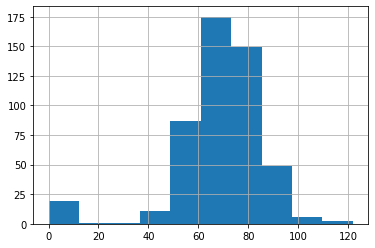

In [147]:
diabetesdf[diabetesdf['Outcome']== 0]['BloodPressure'].hist()

Here we can see people having below average blood pressue have the maximum chance of diabetes ,
Infact the range is in between 70 to 80.

<AxesSubplot:>

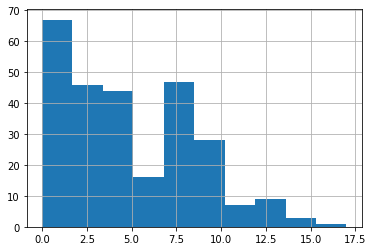

In [177]:
# Ploting the histogram of no of time Pregnancy of peoples having diabetes

diabetesdf[diabetesdf['Outcome']== 1]['Pregnancies'].hist()

<AxesSubplot:>

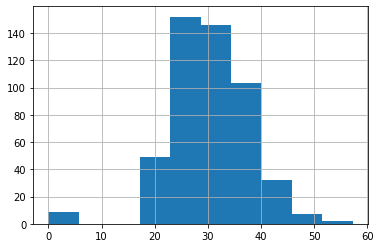

In [148]:
# Ploting the histogram of BMI of people NOT having diabetes

diabetesdf[diabetesdf['Outcome']== 0]['BMI'].hist()

<AxesSubplot:>

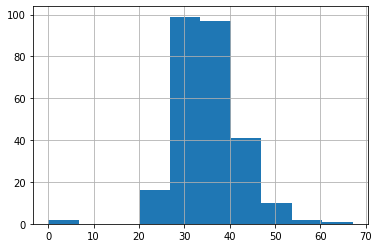

In [149]:
# Ploting the histogram of BMI of people having diabetes

diabetesdf[diabetesdf['Outcome']== 1]['BMI'].hist()

<AxesSubplot:>

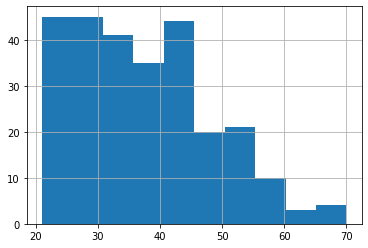

In [150]:
# Age group of people having diabetes
diabetesdf[diabetesdf['Outcome']== 1]['Age'].hist()

<AxesSubplot:ylabel='Frequency'>

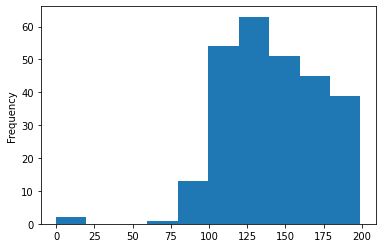

In [151]:
# Glucose level range of people having diabetes

diabetesdf[diabetesdf['Outcome']== 1]['Glucose'].plot.hist()

In [152]:
diabetesdf.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


From above table we can analyze the average value of all the feature on respective outcome.

In [153]:
# deviding the data into features data and target data
X = diabetesdf.drop('Outcome',axis=1)

In [154]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [155]:
y = diabetesdf['Outcome']

In [156]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Before training the data, We have seen the data contains high range of values i.e some values are in zeros and some are in hundreds. Thus we need to standardize the data.
## Data standardization

In [157]:
scaler = StandardScaler()
standardizedData = scaler.fit_transform(X)
print(standardizedData)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [158]:
#  we only standardize the feature of the dataset except the outcome cause that is not needed
X=standardizedData

#### Splitting data and Model Training

In [159]:
# Splitting the data into train set and test set
# Train set = 80%, Test set = 20%, RandomState = 0
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state=0)

In [160]:
# Shape of training  and testing data
print("Shape of training data: \n ",X_train.shape )
print("Shape of testing data: \n ",X_test.shape )


Shape of training data: 
  (614, 8)
Shape of testing data: 
  (154, 8)


Here we are using Support Vector Machine algorithm for this type of classification problems

In [161]:
# creating the instance of the model
svmModel = svm.SVC(kernel="linear",probability=True)

In [162]:
# Fit data to train the model
svmModel.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [163]:
# Prediction on training data
from sklearn.metrics import accuracy_score
y_train_pred =svmModel.predict(X_train)
accuracy_score(y_train_pred,y_train)

0.7801302931596091

It gives 78.01% of accuracy on training data.

In [164]:
# Prediction on test data
y_pred = svmModel.predict(X_test)
print(f"Accuracy of the SVM classifier is: {accuracy_score(y_pred,y_test)}")

Accuracy of the SVM classifier is: 0.7792207792207793


It gives 77.92% of accuracy on testing data.

## Performance Metrics


The metrics that one chooses to evaluate a machine learning model play an important role. The choice of metric influences how the performance of machine learning algorithms can be measured and compared.

In [165]:
# Importing all necessary libraries
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve, auc
confusion_matrix(y_test,y_pred)

array([[89, 11],
       [23, 31]])

<AxesSubplot:>

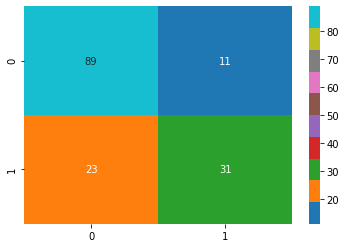

In [166]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True,cmap="tab10")

True Negative : 89;
True Positive : 31;
False Negative : 23;
False Positive : 11;

#### AUC score & AUC-ROC curve

AUC for our classifier is: 0.8866666666666667


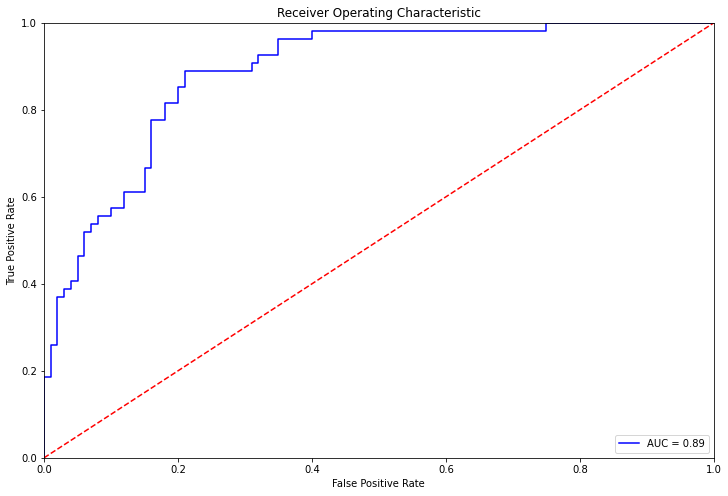

In [169]:

class_probabilities = svmModel.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC Score
An excellent model poses an AUC near to the 1 which tells that it has a good measure of separability. A poor model will have an AUC near 0 which describes that it has the worst measure of separability.

#### ROC Curve
The closer an AUC-ROC curve is to the upper left corner, the more efficient the test being performed will be.

# Predictive model analysis

#### Input data should be like 
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)


In [179]:
input_data =(0,162,76,56,100,53.2,0.759,25)
# converting input data into array to fit into the prediction model
input_array_data = np.asarray(input_data)

In [180]:
# reshaping input data
reshaped_input= input_array_data.reshape(1,-1)

In [186]:
# standardize the input data 
std_reshaped_input = scaler.fit_transform(reshaped_input)
# print(std_reshaped_input)

In [183]:
result =svmModel.predict(std_reshaped_input)
print(result)
if result[0]== 1:
    print("Sir you have diabetes,Please go for cure..")
else:
    print("Congrats you don't have diabetes")

[1]
Sir you have diabetes,Please go for cure..


# Finished 

## Exporting model 

In [185]:
# exporting modek as pkl file
import pickle
pickle.dump(svmModel, open('svmModelDiabetes.pkl','wb'))
